# Code to create Sequence Logos  

Most code below is adapted from the [LogoMaker package tutorials](https://logomaker.readthedocs.io/en/stable/tutorial.html).

## Pipeline  

Protein sequences were uploaded to [jackHMMER](https://www.ebi.ac.uk/Tools/hmmer/search/jackhmmer) and iterated until at least 100 homolougous sequences were identified. Up to date records of identified homolouges were retreived from [UniprotKB](https://www.uniprot.org/uploadlists/), and sequences aligned with MAFFT using a BLOSUM30 scoring matrix. This sequence alignment was then uploaded to [Skylign](http://skylign.org) and an HMM matrix was generated using the "Remove mostly empty columns" setting. The matrix was then pasted into a spreadsheet, and the top 3 rows, final 4 columns were deleted and exported as the `.csv` files available in this directory. 

## Environment settings  

This notebook was run from a conda environment running Python 3.9.7. 

In [27]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm

# Displays logos inline for the notebook
%matplotlib inline
plt.ion

<function matplotlib.pyplot.ion()>

## Logo generation functions  

Both functions take a Skylign HMM matrix (ideally truncated to regions of interest) and generate a normalized HMM logo with good default parameters for figure design. `make_logo1` was used for Fig 5 and Fig S5, `make_logo2` was used for Fig S4. 

In [28]:
def make_logo1(input_csv):
    # Transform matrix 
    norm_mat_in = lm.transform_matrix(input_csv, normalize_values=True)
    # Generate logo
    logo = lm.Logo(norm_mat_in,
                fade_probabilities=True,
                stack_order='small_on_top',
                font_name='Arial Rounded MT Bold',
                color_scheme='black',
                edgecolor='black',
                edgewidth=0.2)
    logo.ax.set_xlabel('Position',fontsize=14)
    logo.ax.set_ylabel("Probability", labelpad=-1,fontsize=14)
    return(logo)

def make_logo2(input_csv):
    # Transform matrix 
    norm_mat_in = lm.transform_matrix(input_csv, normalize_values=True)
    # Generate logo
    logo = lm.Logo(norm_mat_in,
                fade_probabilities=True,
                #stack_order='small_on_top',
                font_name='Arial Rounded MT Bold',
                color_scheme='NajafabadiEtAl2017',
                edgecolor='black',
                edgewidth=0.2)
    logo.ax.set_xlabel('Position',fontsize=14)
    logo.ax.set_ylabel("Probability", labelpad=-1,fontsize=14)
    return(logo)

## Figure 5  

In [29]:
mat_in = "LapC1_skylign.csv" # path to the matrix
df = pd.read_csv(mat_in, index_col=0) # pandas for csv handling

# Amino acids are indexed by row 
turn_motif = df.iloc[31:44] 
fxxxd_motif = df.iloc[74:83]

## List available logomaker colour palettes:
# lm.list_color_schemes()


### Figure 5 C - Helix-Turn Motif  

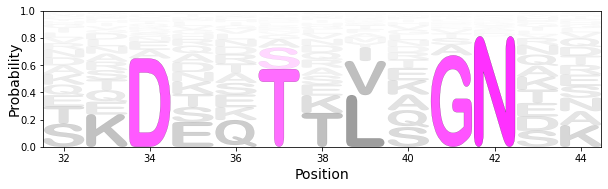

In [30]:
# Generate logo
lapc1_turn = make_logo1(turn_motif)

# Extra styling - colour key residues
lapc1_turn.style_glyphs_in_sequence('..D..S...GN..',
                              color='magenta')
lapc1_turn.style_glyphs_in_sequence('.....T.......',
                              color='magenta')
# Display 
lapc1_turn 

## Save SVG figure
# plt.savefig("lapc1_turn_motif.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)

### Figure 5 D - FXXXD Motif

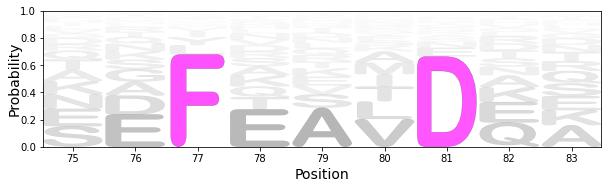

In [31]:
# Generate logo
lapc1_fxxxd = make_logo1(fxxxd_motif)

# Extra styling - colour key residues
lapc1_fxxxd.style_glyphs_in_sequence('..F...D..', 
                                    color='magenta')
# Display 
lapc1_fxxxd

## Save SVG figure
# plt.savefig("lapd1_turn_motif.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)

## Figure S4 

In [32]:
mat_in = "LapD2_skylign.csv" # path to the matrix
df = pd.read_csv(mat_in, index_col=0) 

# Areas of interest: 
helix1_sample = df.iloc[6:20]
turn_region = df.iloc[54:65]
helix2_sample = df.iloc[85:99]
helix2_sample2 = df.iloc[108:118]

### Fig S4 - B1

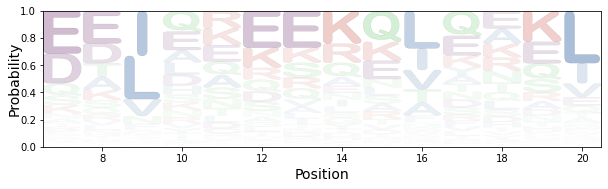

In [33]:
# Generate logo
lapd2_helix1 = make_logo2(helix1_sample)

# Display 
lapd2_helix1

# # Save SVG file
# plt.savefig("lapd2_helix1.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)

### Fig S4 - B2

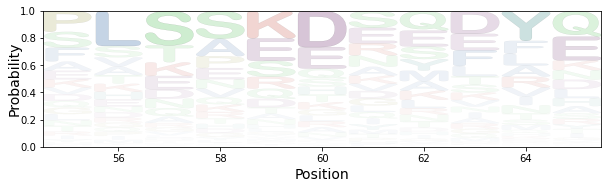

In [34]:
# Generate logo
lapd2_turn = make_logo2(turn_region)
# Display 
lapd2_turn

## Save SVG
# plt.savefig("lapd2_turn_region.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)

### Fig S4 - B3

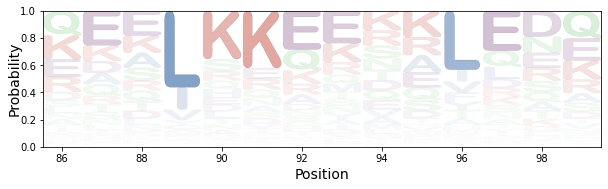

In [35]:
# Generate logo
lapd2_helix2 = make_logo2(helix2_sample)
# Display 
lapd2_helix2

## Save SVG
# plt.savefig("lapd2_helix2.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)

### Fig S4 - B4

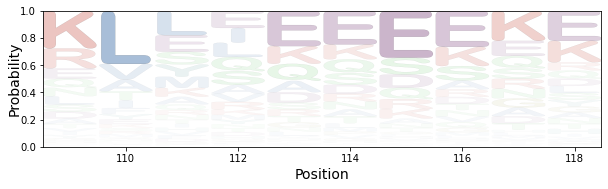

In [36]:
lapd2_helix2_s2 = make_logo2(helix2_sample2)
# Display 
lapd2_helix2_s2

## Save SVG
# plt.savefig("lapd2_helix2_location2.svg",
#             bbox_inches='tight',
#             pad_inches=0.1)


## Figure S5  logo (not used in final paper)

In [37]:
mat_in = "LapD1_skylign.csv" # path to the matrix
df = pd.read_csv(mat_in, index_col=0) # pandas for csv handling

# Amino acids are indexed by row 
turn_motif_d = df.iloc[31:44] 
fxxxd_motif_d = df.iloc[74:83]

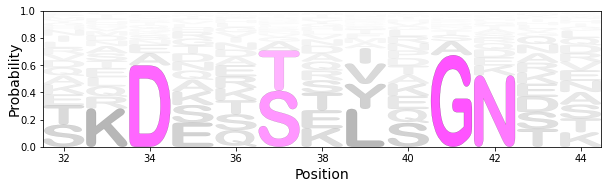

In [38]:
# Generate logo
lapd1_turn = make_logo1(turn_motif_d)

# Extra styling - colour key residues
lapd1_turn.style_glyphs_in_sequence('..D..S...GN..',
                              color='magenta')
lapd1_turn.style_glyphs_in_sequence('.....T.......',
                              color='magenta')
# Display 
lapd1_turn 

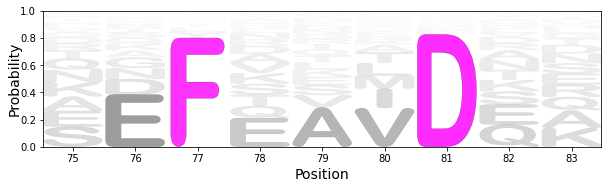

In [39]:
# Generate logo
lapd1_fxxxd = make_logo1(fxxxd_motif_d)

# Extra styling - colour key residues
lapd1_fxxxd.style_glyphs_in_sequence('..F...D..', 
                                    color='magenta')
# Display 
lapd1_fxxxd